## Graph Isomorphism
***

In [13]:
import matplotlib.pyplot as plt
import numpy as np #provides numerical arrays in python written in C
import itertools as it
import networkx as nx # provides algorithms for graphs using it for visualising graphs
import math

In [14]:
plt.rcParams['figure.figsize'] = (14, 6)

In [15]:
#drawing params
params = {'node_color': 'red', 'node_size':800, 'font_size': 18, 'with_labels':True}

## Graphs
***

In [16]:
#making empty graph
#constructor of instance difined in networkx
G = nx.Graph()

In [17]:
#using tuple using array/lists that cant be changed
# three elements in tuple, three nodes three edges
#cant use sets
E = ((1,0),(1,2),(0,2))

In [18]:
# adding tuple edges
G.add_edges_from(E)

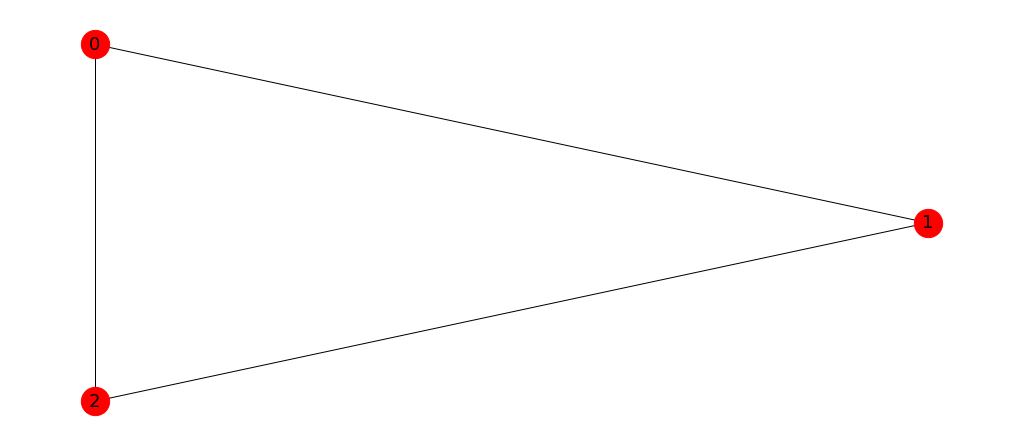

In [19]:
#can see all edges connected
nx.draw_circular(G, **params)

## Adjacency Matrices
***

In [20]:
#first row and col relate to 0
#0 no connection, 1 connection float not really suitable for binary
print(nx.to_numpy_array(G))

[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [21]:
#convert to unassigned 8 bit integer
A = nx.to_numpy_array(G).astype(np.uint8)
print(A)

[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [22]:
#transpose is where you take rows, turn into cols, and use that as matrix
print(A.T) # numpy has method with T which transpose the matrix

[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [23]:
# ask T are they all ==
print(A.T == A)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [24]:
(A.T == A).all()

True

In [25]:
#cleaner way of getting matrix without []
def matrix_print(A):
    for r in A:
        print(str(r)[1:-1])
    print()

In [26]:
#easier to read
matrix_print(A)

0 1 1
1 0 1
1 1 0



## Permutations
***

In [27]:
# one to four as thats to three rather than starting at 0 looks cleaner
L = list(range(1,4))
L

[1, 2, 3]

In [28]:
#permutations how many time such a element may be swapped
#grows factoral in length of list, very bad case senario although not the worst
perms = it.permutations(L)

for perm in perms:
    print(perm)
#six permutations of 3
#perms generator generating one at a time

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


## Permutation Matrices
***

In [29]:
N = 3

In [30]:
#np will take a python gernerator and cast into an array
#making array for 1 to N, one dimensional array
L = np.array(range(1, N+1)).astype(np.uint8)
L

array([1, 2, 3], dtype=uint8)

In [39]:
#identity matrix zero everywhere bar diagonal left to right
#if you multi on right or left with another matrix get the same matrix back
I = np.identity(N).astype(np.uint8)
matrix_print(I)

1 0 0
0 1 0
0 0 1



In [42]:
#list(p) each time go around p, passed as list not tuple,give I first second third element
#permutation of rows on identity matrix, matrix with all zero bar having a one in a row
perms = it.permutations(range(N))
for p in perms:
    Pmat = I[list(p)]
    matrix_print(Pmat)

1 0 0
0 1 0
0 0 1

1 0 0
0 0 1
0 1 0

0 1 0
1 0 0
0 0 1

0 1 0
0 0 1
1 0 0

0 0 1
1 0 0
0 1 0

0 0 1
0 1 0
1 0 0



In [43]:
perms = it.permutations(range(N))

#treat np array above as matrix
for p in perms:
    Pmat = I[list(p)]
    Lp = L * Pmat # not matrix multi @ operator to multi two matrices
    
    print(Lp)


[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[1 0 0]
 [0 0 3]
 [0 2 0]]
[[0 2 0]
 [1 0 0]
 [0 0 3]]
[[0 2 0]
 [0 0 3]
 [1 0 0]]
[[0 0 3]
 [1 0 0]
 [0 2 0]]
[[0 0 3]
 [0 2 0]
 [1 0 0]]


In [45]:
perms = it.permutations(range(N))

for p in perms:
    Pmat = I[list(p)]
    Ap = Pmat @ A @ Pmat.T 
    
    matrix_print(Ap)

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

